
# <span style="color:rgb(213,80,0)">**Examen de Robótica**</span>

## **Segundo Examen Parcial**

Profesor: Ing. Erik Peña Medina


Alumno: Hernández Marín Roberto Kael


Semestre 2025\-2


Grupo 01

## Resumen

En el examen se plantea una solución de planificación de trayectorias para un robot SCARA mediante un perfil polinomial 3\-4\-5. Para ello, se presenta el modelado cinemático completo de la postura del robot junto con el cálculo del índice de manipulabilidad. Mediante una simulación en el entorno de Gazebo se comprueba la solución del modelo cinemático inverso de la postura del robot.

## Contenido del documento
-  Introducción
-  Descripción del problema
-  Propuesta de solución
-  Experimentos o simulaciones
-  Resultados
-  Conclusiones

Conclusiones

## Introducción

En este trbajo se realiza la planificación de las trayectorias de un robot SCARA, ya que esto es muy importante para optimizar el movimiento de de este tipo de robots manipuladores. Estos robots SCARA son muy utilizados en aplicaciones de ensamblaje y manufactura, lo anterior ya que cuentan con una gran precisión sobre el plano. La trayectoria seleccionada es un perfil polinomial 3\-4\-5, debido a que garantiza la suavidad del movimiento porque ofrece una aceleración inicial y final cero, lo cual disminuye en gran medida las vibraciones y esfuerzos.


Para llevar a cabo lo anterior, se realiza el modelado cinemático directo e inverso para el robot SCARA, así como el cálculo del índice de manipulabilidad, ya que este evalúa la capacidad del robot para desplazarse en todas direcciones. Posteriormente se obtiene el análisis dinámico de suavidad mediante perfiles de velocidad y aceleración.

## Hipótesis

El robot contará con una suavidad de movimiento, ya que la trayectoria polinomial 3\-4\-5 eliminará las discontinuidades en la aceleración. Es decir, el jerk estará controlado, reduciendo los esfuerzos en las articulaciones del robot.


Se pretende que el índice se mantendrá alrededor de 0.3, lo que equivaldría al 30% del máximo teórico. (30% del máximo teórico) en la mayoría de su trayectoria.


De igual manera se pretende que en aplicación el robot tenga menos consumo energético al tener aceleraciones suaves, Además de que este tipo de perfiles reducen los picos de torque.

## Obejtivo

Implementa una trayectoria polinomial 3\-4\-5 para el robot SCARA de manera que se asegure el movimiento suave.

## Metas
-  Modelo cinemático directo e inverso del robot scara.
-  El cálculo del índice de manipulabilidad.
-  Determinar el tipo de trayectoría parámetrizada a utilizar ( investigar).
-  Parámetros del robot y lugar geometrico de la trayectoría (fijos).
-  Variables (Tiempo de ejecución)
-  Simulaciones.
-  Resultados.
-  Conclusiones.
## Funciones

Definimos una función llamada Tij, la cual representa una matriz de transformación homogénea general. A la función se le agregan parámetros de desplazamiento (x\_i\_j, y\_i\_j y z\_i\_j), además de los 3 ángulos (gi\_j, bi\_j y ai\_j). Con lo anterior se puede construir una matriz 4x4 que describe cómo se transforma el sistema de coordenadas respecto a otro, lo cual es necesario para representar los movimientos compuestos del robot.


In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Planteamiento del modelo cinemático del robot

Definimos las variables. Los theta representan los ángulos de los eslabones rotacionales, mientras que las L son las longitudes de los eslabones. Nos apoyamos de x\_0\_1 y y\_0\_1 para dar la posición inicial desde el sistema base.


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1


Cada T es una representación de una transformación entre dos eslabones consecutivos. Una vez planteadas cada una de ellas son importantes debido a que el movimiento se acumula al multiplicarlas.


In [3]:
T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)

In [4]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)

In [5]:
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)

In [6]:
T_3_P = Tij(L_3,0,0,0,0,0)


Para tener la matriz de posición desde 0 a P se calcula la matriz de transformación total desde el sistema base hasta el efector final.


In [7]:
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)

## **Vector de postura del robot**

Se construye el vector de postura final tomando las coordenadas x y y desde la matriz y se suma la orientación total.


In [8]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]

## Descripción del experimento

Al momento de diseñar los sistemas para los robots manipuladores es crucial planear la trayectria que va a seguir el robot. Esto para que tenga un mejor desempeño y sea lo suficientemente estable en cuanto a su control. Para cumplir con lo anterior una de las soluciones es implementar una trayectoria a partir de un perfil polinomial 3\-4\-5, la cual se aplica al robot SCARA.


Se medirá la eficiencia de esta trayectoria y el funcionamiento general del robot mientras hace una trayectoria entre dos puntos ubicados en el plano de trabajo. Esto se basa en conceptos cinemáticos y se verifica por medio del uso de instrumentos de simulación y de visualización.

## Perfil polinomial 3\-4\-5

Para la interpolación del movimiento entre los dos puntos, usaremos una curva de quinto grado denominada perfil 3\-4\-5. Esta clase de curvas son generalmente recomendadas cuando hay la necesidad de que exista aceleración cero al comienzo y al fin del viaje, lo cual haría que se reducieran las vibraciones y el esfuerzo necesario. Aparte, con esto elegido no habría perturbaciones bruscas en la velocidad por lo que tendría movimientos suaves y más eficientes.


El perfil 3\-4\-5 se define como:


$$\lambda (t)=10{\left(\frac{t}{t_f }\right)}^3 -15{\left(\frac{t}{t_f }\right)}^4 +6{\left(\frac{t}{t_f }\right)}^5$$

donde λ(t) varía desde 0 a 1 a lo largo del tiempo y tf es el tiempo total por el cual se va a ejecutar la trayectoria.


A través de λ(t) se interpolan las posiciones y direcciones deseadas.


$$x(t)=x_{in} +\lambda (t)(x_{fin} -x_{in} )$$

$$y(t)=y_{in} +\lambda (t)(y_{fin}  - y_{in} )$$

$$\theta_P (t)=\theta_{P_{in} } +\lambda (t)(\theta_{P_{fin} } -\theta_{P_{in} } )$$

Lo anterior nos permite definir con exactitud el espacio geométrico por el cual debe moverse el robot.

## Parámetros utilizados

Para hacer la simulación, se determinaron tanto parámetros de la estructura del robot como las condiciones de la trayectoria.


**Longitudes de los eslabones:**


$$L_1 =0.5m$$

$$L_2 =0.5m$$

$$L_3 =0.3m$$

**Puntos de inicio y final del recorrido**


$$P_{\textrm{in}} =(0.4,~-0.1),~\theta_{P_{\textrm{in}} } =\frac{\pi }{2}$$

$$P_{\textrm{fin}} =(0.0,~-1.3),~\theta_{P_{\textrm{fin}} } = -\frac{\pi }{2}$$

**Tiempo de simulación**


$$t_f =20\,\textrm{s},~~\textrm{con}\;\textrm{paso}\;\textrm{temporal}\;\Delta t= 0.1\,\textrm{s}$$


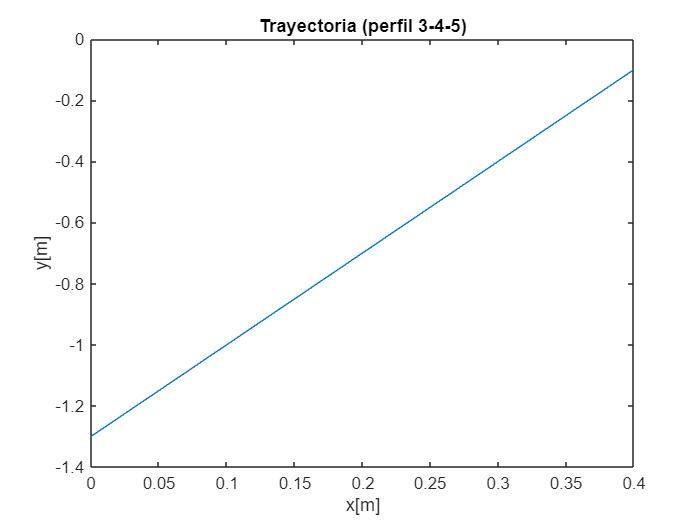

In [9]:
% Parametros del robot
L1 = 0.5;
L2 = 0.5;
L3 = 0.3;

%Punto inicial
x_in = 0.4;
y_in = -0.1;

%Punto final
x_fin = 0.0;
y_fin = -1.3;

%Orientación inicial y final [rad]
theta_P_1 = pi/2;
theta_P_2 = -pi/2;

%Definición de los parámetros de la trayectoria
t_total = 20;%s
t_in = 0.1; %s
t_sim = 0:t_in:t_total;
theta_P_1 = 0;
theta_P_2 = 0;

%Trayectoria
xp = zeros(size(t_sim));
yp = zeros(size(t_sim));
theta_P = zeros(size(t_sim));

%Trayectoria polinomial 3-4-5
phi = 10*(t_sim/t_total).^3 - 15*(t_sim/t_total).^4 + 6*(t_sim/t_total).^5;

%Generación de la trayectoria utilizando phi
xp = x_in + phi .* (x_fin - x_in);
yp = y_in + phi .* (y_fin - y_in);
theta_P = theta_P_1 + phi .* (theta_P_2 - theta_P_1);

%Grafica
figure;
plot(xp, yp);
xlabel('x[m]');
ylabel('y[m]');
title('Trayectoria (perfil 3-4-5)');

## Solución de la cinemática

Para convertir las coordenadas deseadas a configuraciones de las articulaciones del robot, utilizamos un modelo cinemático inverso analítico. Partiendo desde la posición deseada y a partir de ahí calculando  los ángulos correspondientemente con los cuales los eslabones del robot  se debern mover.


Calculamos una posición intermedia anterior.


$$x_3 =x(t)-L_3 \cos (\theta_P (t))$$

$$y_3 =y(t)-L_3 \sin (\theta_P (t))$$

Luego estos ángulos se obtienen utilizando relaciones trigonométricas y la ley del coseno. Lo anterior hace que la solución garantice una trayectoria realizable y coherente con la geometría del robot.


$$R=\left(\sqrt{x_3^2 }\right)+\left(\sqrt{y_3^2 }\right)$$

Utilizando la ley del coseno en el triángulo formado por los eslabones


$$\theta_2 =\cos^{-1} \left(\frac{R^2 -L_1^2 -L_2^2 }{2L_1 L_2 }\right)$$

Este valor determina el ángulo relativo entre los dos primeros eslabones.


Para theta1 se usan dos componentes angulares.


$$\left\lbrace \begin{array}{l} \beta =\tan^{-1} \left(\frac{x_3 }{y_3 }\right)\newline \psi =\cos^{-1} \left(\frac{R^2 +L_1^2 -L_2^2 }{2L_1 R}\right)\newline \theta_1 =\beta -\psi  \end{array}\right.$$

Y finalmente, despejamos para obtener theta3.


$$\theta_P =\theta_1 +\theta_2 +\theta_3$$

$$\theta_3 =\theta_P -\theta_1 -\theta_2$$
## Índice de manipulabilidad

El índice de manipulabilidad es una medida escalar que permite cuantificar qué tan bien puede el robot moverse desde una cierta configuración. Es útil para detectar zonas del espacio de trabajo donde el robot pierde grados de libertad (singularidades).


$$w=\left|\sin (\theta_2 )\right|$$

Con este dato podemos interpretarlo de la siguiente manera:


Si w tiende a 0 el robot se encuentra en una configuración singular, con pérdida de control direccional. En cambio si w se aproxima a 1 el robot se encuentra en una zona óptima de movilidad, con capacidad máxima de reacción ante comandos en cualquier dirección.




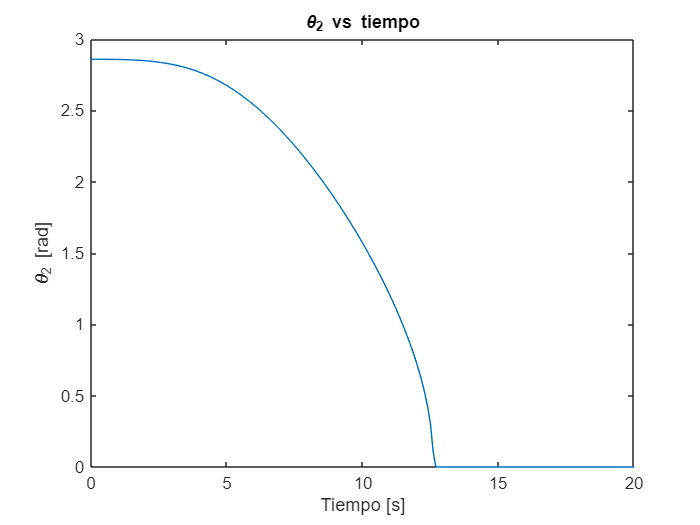

In [10]:
%Vectores de ángulos y manipulabilidad
theta1 = zeros(size(t_sim));
theta2 = zeros(size(t_sim));
theta3 = zeros(size(t_sim));
w = zeros(size(t_sim));

%Cinemática inversa
for i = 1:length(t_sim)
    x3 = xp(i) - L3 * cos(theta_P(i));
    y3 = yp(i) - L3 * sin(theta_P(i));
    R2 = x3^2 + y3^2;
    cos_theta2 = (R2 - L1^2 - L2^2) / (2 * L1 * L2);
    cos_theta2 = min(max(cos_theta2, -1), 1);  % Evitar errores numéricos
    theta2(i) = acos(cos_theta2);
    beta = atan2(y3, x3);
    cos_psi = (R2 + L1^2 - L2^2) / (2 * L1 * sqrt(R2));
    cos_psi = min(max(cos_psi, -1), 1);
    psi = acos(cos_psi);
    theta1(i) = beta - psi;
    theta3(i) = theta_P(i) - theta1(i) - theta2(i);

%Índice de manipulabilidad
    w(i) = abs(sin(theta2(i)));
end

%Grafica ángulo theta2 vs tiempo
figure;
plot(t_sim, theta2);
xlabel('Tiempo [s]');
ylabel('\theta_2 [rad]');
title('\theta_2 vs tiempo');


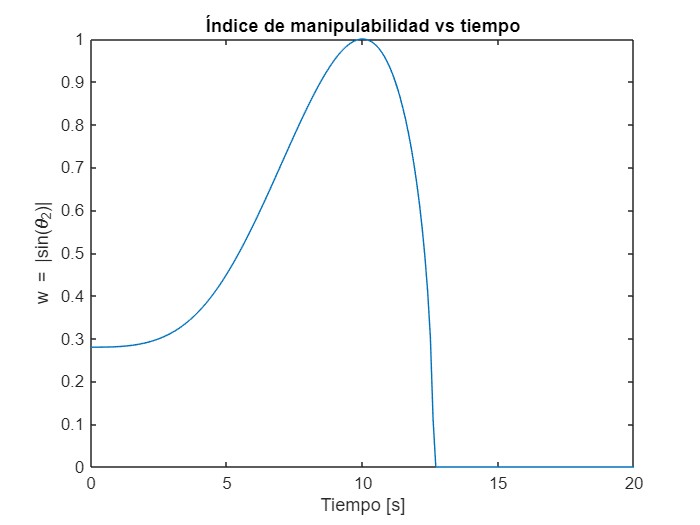

In [11]:

%Grafica índice de manipulabilidad
figure;
plot(t_sim, w);
xlabel('Tiempo [s]');
ylabel('w = |sin(\theta_2)|');
title('Índice de manipulabilidad vs tiempo');


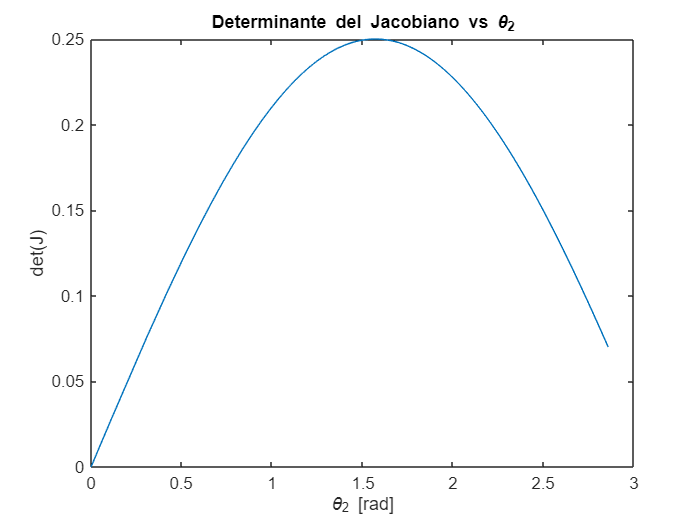

In [12]:

%Determinante del Jacobiano
syms theta_12 L1_sym L2_sym
detJ_sym = L1_sym * L2_sym * sin(theta_12);
f_detJ = matlabFunction(detJ_sym, 'Vars', [theta_12, L1_sym, L2_sym]);

%Angulos obtenidos
theta2_vals = theta2;
det_vals = f_detJ(theta2_vals, L1, L2);

%Grafica determinante del Jacobiano vs theta2
figure;
plot(theta2_vals, det_vals);
xlabel('\theta_2 [rad]');
ylabel('det(J)');
title('Determinante del Jacobiano vs \theta_2');

In [13]:
for i=1:length(t_sim)
    % Solución de la cinematica inversa de la postura del robot

    x3 = xp(i) - L3*cos(theta_P(i));
    y3 = yp(i) - L3*sin(theta_P(i));

    theta2(i) = acos((x3^2+y3^2-L1^2-L2^2)/(2*L1*L2));

    beta = atan2(y3, x3);

    psi = acos((x3^2+y3^2+L1^2-L2^2)/(2*L1*sqrt(x3^2+y3^2)));

    theta1(i) = beta + psi;

    theta3(i) = theta_P(i) - theta1(i) - theta2(i);
    % calculo de w[i]

    w(i) = abs(sin(theta2(i)));

end

## Resultados

In [14]:
plot(t_sim, theta2)


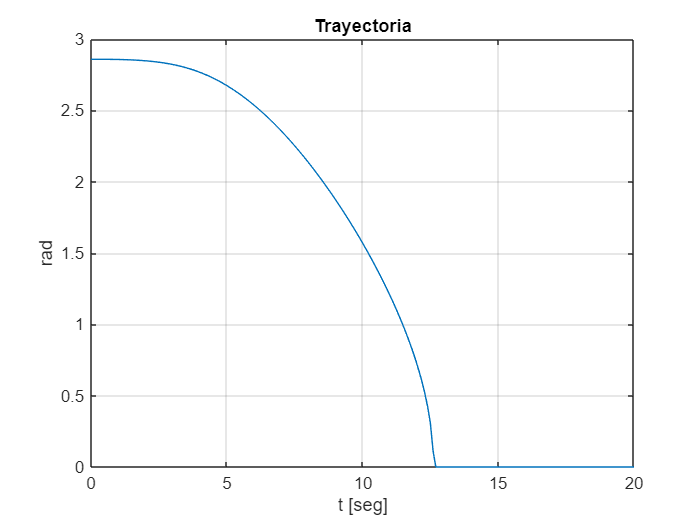

In [15]:
grid on
title('Trayectoria')
xlabel('t [seg]')
ylabel('rad')


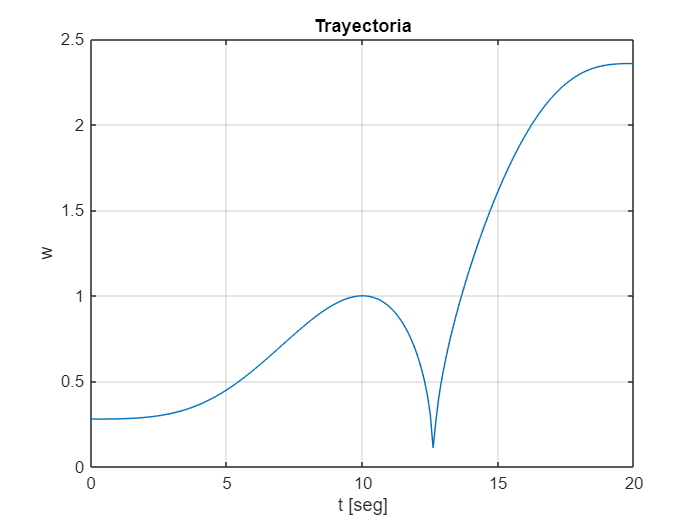

In [16]:
plot(t_sim, w)
grid on
title('Trayectoria')
xlabel('t [seg]')
ylabel('w')

## Simulación

La simulación de la trayectoria fue realizada en ROS2 utilizando el entorno de visualización de gazebo, donde se puede observar en tiempo real la ejecución del perfil 3\-4\-5 por parte del robot. El código fue desarrollado en pytohn mediante un nodo que publica los ángulos calculados a partir de la cinemática inversa.


Se incluye un video de la simulación dentro de la carpeta correspondiente del repositorio de GitHub.

## Conclusiones

La implementación de la trayectoria del perfil polinomial 3\-4\-5 en el robot SCARA ayudó a confirmar que es posible generar un movimiento suave, eficiente y sin tantas discontinuidades. Además que esto puede reducir los esfuerzos y mejorar la respuesta del sistema.


Con el modelo directo e inverso se estableció una relación entre los espacios de trabajo. La solución además ayuda a validar cada punto de la trayectoria. La trayectoria generada fue continua en posición, velocidad y aceleración, como lo evidenciaron las gráficas.


En cuanto a la manipulabilidad, se podría decir que el robot opera en unas condiciones favorables, ya que no entra en zonas de singularidad. Y por otra parte, el cálculo y la gráfica del determinante del Jacobiano fue de mucha ayuda para corroborar esto.


Por lo tanto se demuestra que el perfil 3\-4\-5 es muy bueno y se puede usar fácilmente para planificar trayectorias en los robots manipuladores, especialmente cuando se necesita una mayor suavidad y mayor estabilidad. Además, se pudo aprender y observar la importancia del índice de manipulabilidad y el determinante del Jacobiano para anticipar problemas que pueda tener el robot.

